# Librairies

### Import usefull librairies

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import tree
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.feature_selection import RFE

import random

from sklearn import svm 
from sklearn.svm import SVC




# Explore The Dataset

### Load the dataset

In [5]:
creditcard = pd.read_csv('creditcard.csv')
creditcard.head()       

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


It seems we only have numerical data, we will have a look of the types of our data

In [6]:
creditcard.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

We have only numerical data, so that no need to change any types. Do we have any missing value?

In [8]:
null_cols = creditcard.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

We don't have any missing value. Let's display the heatmap to check if feature are colinear

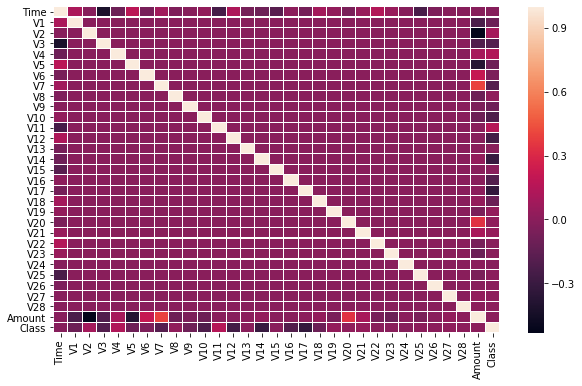

In [5]:
corr = creditcard.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr,linewidths=.1)

# Split data to have train and test

We split data to have 20% for test and 80 for train. We want to predict the Class (it is fraudulous or not)

In [6]:
len(creditcard)

284807

In [9]:
df = creditcard
X = df.drop('Class', axis=1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
y_train.Class.value_counts()

0    227438
1       407
Name: Class, dtype: int64

# model selection

In [ ]:
cross val cv=10

In [ ]:
pas accuracy

In [ ]:
F1 10 score puis moyenne : le score pour 1 model (estimator ???)

In [ ]:
apres selection du meilleur model j'evalue sur tout le train

In [ ]:
ensuite sur test

# Model selection

## Logistic Regression

On crée un model logistic, on fit le model sur nos données, et on predit le y

In [89]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log_model = log_model.predict(X_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
print("Training:", log_model.score(X_train, y_pred_log_model))

Training: 1.0


On a un score de 1: Il y a donc un probleme (soit le target est dans le dataset, soit les classes sont mal-reparties

On va regarder certaines metrics

In [91]:
print("Accuracy Training:", accuracy_score(y_train, y_pred))

Accuracy Training: 0.9995567161886371


On a un Accuracy très bon (trop elevé) 
Accuracy (ACC) = ΣTP + ΣTN / Σ Total 

On affiche la matrice de confusion pour voir la repartition

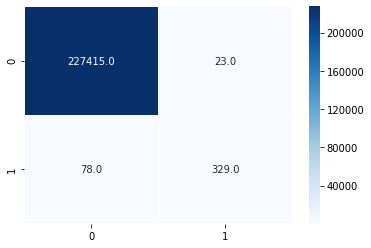

In [92]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='.1f', cmap='Blues', linewidths=.01)

En effet l'Accuracy est bien calculé et très elevé, mal representative

In [94]:
(227415 + 329) /  (227415 + 23 + 78 + 329)

0.9995567161886371

Essayons la Balance accuracy pour prendre en compte le déséquilibrage des classes

In [95]:
print("Balance accuracy Training:", balanced_accuracy_score(y_train, y_pred))

Balance accuracy Training: 0.9041263409464853


La balance accuracy n'est pas non plus representative BA = (TP/P + TN/N ) 2

In [98]:
((227415 / (227415 + 23)) + (329 / (329 + 78)) ) / 2

0.9041263409464853

On calcule le recall

In [99]:
print("Recall Training:", recall_score(y_train, y_pred))

Recall Training: 0.8083538083538083


Le recall n'est pas non plus representatif car le model predit bien le cas de non fraude TPR = TP/P

On calcule la precision

On decide donc de faire de la cross validation avec 10 set de data

In [83]:
cv_log_model_f1 = cross_val_score(LogisticRegression(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_log_model_f1.mean()

In [85]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train, y_train)


ValueError: Invalid parameter bootstrap for estimator LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

# Try the RandomForestModel

On crée un model logistic, on fit le model sur nos données, et on predit le y

In [25]:
cv_f1 = cross_val_score(RandomForestClassifier(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()



//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_

0.8448277844920715

Random forest model is even better then linear and logistic regression

# GradientBoostingClassifier

In [26]:
cv_f1 = cross_val_score(GradientBoostingClassifier(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

0.5983062977827609

# BaggingClassifier

In [27]:
cv_f1 = cross_val_score(BaggingClassifier(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.8467093297850328

# DecisionTree

In [45]:
cv_f1 = cross_val_score(tree.DecisionTreeClassifier(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()



0.7812796137091625

# Naive Bayes

In [44]:
cv_f1 = cross_val_score(GaussianNB(), 
                        X_train, y_train, cv=10, scoring="f1")
cv_f1.mean()

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.24381065061665944

# Choose your model, train it on train dataset then on test dataset

We choose the model which the best score: RandomForestClassifier

In [46]:
clf_vf = RandomForestClassifier()
clf_vf.fit(X_train, y_train)


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_pred = clf_vf.predict(X_train)

In [53]:
print("Training F1 score:", f1_score(y_pred, y_train))

Training F1 score: 0.9761006289308175


In [49]:
clf = RandomForestClassifier()
clf.fit(X_test, y_test)
y_test_pred = clf.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [54]:
print("Testing F1 score:", f1_score(y_test_pred, y_test))

Testing F1 score: 0.9940828402366864


# Test parameters

## n_estimators

In [55]:
clf_t1 = RandomForestClassifier(n_estimators=1)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with n_estimator = 1:", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with n_estimator = 1: 0.8875453446191052


In [56]:
clf_t1 = RandomForestClassifier(n_estimators=20)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with n_estimator = 20:", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with n_estimator = 1: 0.9925742574257426


In [57]:
clf_t1 = RandomForestClassifier(n_estimators=100)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with n_estimator = 100:", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with n_estimator = 100: 0.998769987699877


## max_depth

In [59]:
clf_t1 = RandomForestClassifier(n_estimators=20, max_depth=2)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with max_depth = 2 :", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with max_depth = 2 : 0.6850507982583455


In [60]:
clf_t1 = RandomForestClassifier(n_estimators=20, max_depth=20)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with max_depth = 20 :", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with max_depth = 20 : 0.9863013698630138


In [61]:
clf_t1 = RandomForestClassifier(n_estimators=20, max_depth=100)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with max_depth = 100 :", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with max_depth = 100 : 0.9837702871410736


## min_samples_split

In [62]:
clf_t1 = RandomForestClassifier(n_estimators=20, max_depth=20, min_samples_split=10)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with min_samples_split=10 :", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with min_samples_split=10 : 0.9192708333333333


In [63]:
clf_t1 = RandomForestClassifier(n_estimators=20, max_depth=20, min_samples_split=50)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with min_samples_split=50 :", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with min_samples_split=50 : 0.8735019973368843


In [65]:
clf_t1 = RandomForestClassifier(n_estimators=20, max_depth=20, min_samples_split=20)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with min_samples_split=20 :", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with min_samples_split=20 : 0.8871181938911021


## random_state

In [66]:
clf_t1 = RandomForestClassifier(n_estimators=20, max_depth=20, min_samples_split=10, random_state=5)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with random_state = 5 :", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with random_state = 5 : 0.9129287598944592


In [67]:
clf_t1 = RandomForestClassifier(n_estimators=20, max_depth=20, min_samples_split=50)
clf_t1.fit(X_train, y_train)
y_pred = clf_t1.predict(X_train)
print("F1 score with min_samples_split=50 :", f1_score(y_pred, y_train))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


F1 score with min_samples_split=50 : 0.8669301712779974


# Use GridSearchCV

In [70]:
# use a full grid over all parameters
param_grid = {"n_estimator": [1, 20, 100]
                "max_depth": [2, 20, 100],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "random_state": [5, 10, 50],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
grid_search.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=Fal

In [72]:
grid_search.cv_results_['params']

[{'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 1,
  'min_samples_split': 2},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 1,
  'min_samples_split': 3},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 1,
  'min_samples_split': 10},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 3,
  'min_samples_split': 2},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 3,
  'min_samples_split': 3},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 3,
  'min_samples_split': 10},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 10,
  'min_samples_split': 2},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 10,
  'min_samples_split': 3},
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 3,
  'max_features': 10,
  'min_samples_split': 10},
 {'b

In [73]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'min_samples_split': 2}

# Use the model to predict data

Take a random column

In [27]:
random_number = random.randint(0,len(df))
random_col = pd.DataFrame(df.iloc[random_number]).T.drop("Class", axis=1)

Predict if the transaction is fraudulous

In [28]:
clf.predict(random_col)

array([0])

Catch the row and find if your prediction is good

In [29]:
df.iloc[random_number].Class

0.0

# Visualise with ROC

In [30]:
x_min = 0
x_max = len(df)

In [43]:
f1_score(y_test_pred, y_test)

0.872093023255814

In [44]:
print(balanced_accuracy_score(y_test_pred, y_test))

0.9686005678421996


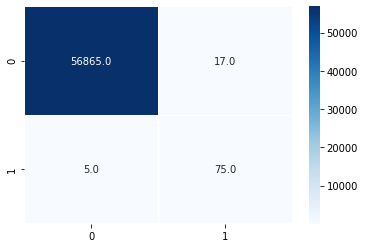

In [46]:
sns.heatmap(confusion_matrix(y_test_pred, y_test), annot=True, fmt='.1f', cmap='Blues', linewidths=.01)

In [ ]:
precision_score(y_test_pred, y_test)

In [52]:
recall_score(y_test_pred, y_test)

0.9375

In [53]:
(75/80 + 56865/56882)/2

0.9686005678421996

In [61]:
clf.predict_proba(X_test)[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

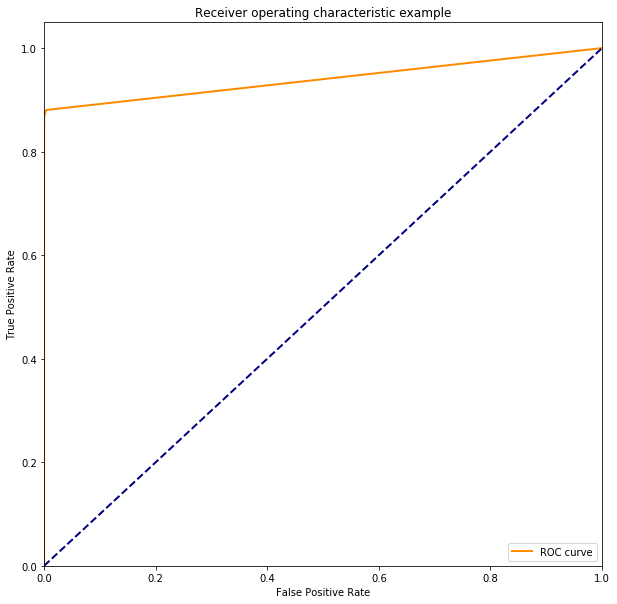

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Plot of a ROC curve for a specific class

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [75]:
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.75839634e-05,
        8.79198171e-05, 1.05503781e-04, 1.58255671e-04, 2.46175488e-04,
        5.27518903e-04, 3.78055214e-03, 1.00000000e+00]),
 array([0.        , 0.40217391, 0.68478261, 0.79347826, 0.81521739,
        0.83695652, 0.85869565, 0.86956522, 0.86956522, 0.88043478,
        1.        ]),
 array([2. , 1. , 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))

In [70]:
y_test_pred_prob = clf.predict_proba(X_test)[:, 1]

In [73]:
y_test_pred_prob[y_test_pred_prob > 0.0]

array([0.1, 0.1, 0.2, 0.1, 0.4, 0.1, 0.1, 0.9, 0.1, 0.8, 0.1, 0.1, 1. ,
       0.1, 0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.6, 0.1, 0.1,
       0.1, 0.8, 0.1, 0.7, 0.7, 1. , 0.1, 0.2, 0.3, 0.7, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.9,
       0.1, 0.2, 0.1, 0.1, 0.6, 0.1, 0.3, 0.1, 1. , 0.1, 0.1, 0.1, 1. ,
       0.1, 0.1, 0.1, 0.5, 0.1, 0.8, 0.1, 0.1, 1. , 0.1, 0.1, 0.7, 0.1,
       0.6, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.8, 0.1, 0.1, 0.4, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.8, 0.1, 1. , 0.1, 0.1, 0.1, 0.9, 0.9,
       0.1, 0.1, 0.6, 0.1, 0.1, 1. , 0.1, 0.1, 1. , 0.1, 0.8, 0.1, 0.1,
       0.3, 0.1, 0.1, 1. , 1. , 0.2, 0.1, 0.1, 0.3, 0.1, 0.9, 1. , 0.4,
       0.9, 0.7, 0.7, 0.1, 0.1, 0.1, 1. , 0.1, 0.1, 0.6, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.8, 1. , 0.4, 0.1, 0.1, 0.1, 0.1, 1. , 1. , 0.1, 0.7,
       0.8, 0.1, 0.1, 0.1, 0.1, 0.1, 1. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.9, 0.1, 0.1, 0.1, 0.1, 1. , 0.1, 0.1, 1. , 0.

# Save the model

In [ ]:
credit_card_rf = open("creditcard.sav","wb")
pickle.dump(clf, credit_card_rf)
credit_card_rf.close()